In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post
from utils.plotting_utils import plots

In [26]:
source = pd.read_excel("../../../data_exploration/acl/tables/pos_text_types.xlsx")
source["Test Set"] = source["Test dataset"].apply(lambda x: "PUD" if x == "PUD" else "Other")

In [27]:
task = "pos"
metric = "Accuracy"

In [63]:
short_model_name = "mbert"

params = {
    "results_dir": "../../../results/",
    "experiment": "acl",
    "short_model_name": short_model_name,
    "task": task,
    "metric": metric
}

M = post.Metrics(**params)
df = M.within_score()
df["Model"] = "mBERT"

params["short_model_name"] = "xlm-roberta"
M = post.Metrics(**params)
temp = M.within_score()
temp["Model"] = "XLM"
df = pd.concat([df, temp])
df["Within-Score"] *= 100

In [64]:
df = utils.merge_tables(df, source, how="left", cols_table2=["Test Set"])

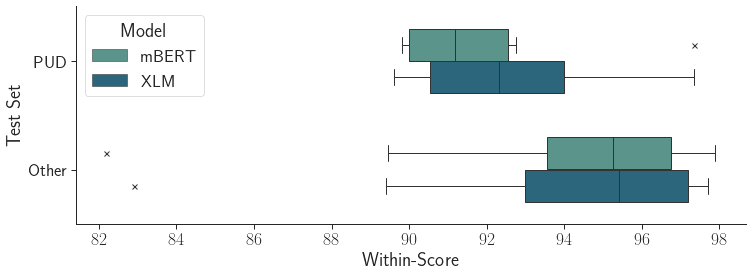

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

g = sns.boxplot(x="Within-Score", 
                y="Test Set", 
                data=df, 
                hue="Model", 
                orient="h", 
                ax=ax, 
                palette="crest", 
                width=0.6,
                linewidth=1,
                flierprops={"marker": "x"})

sns.despine()
plt.show()
plt.close()

In [58]:
df = df.groupby(["Test Set", "Model"], as_index=False, sort=False).mean()

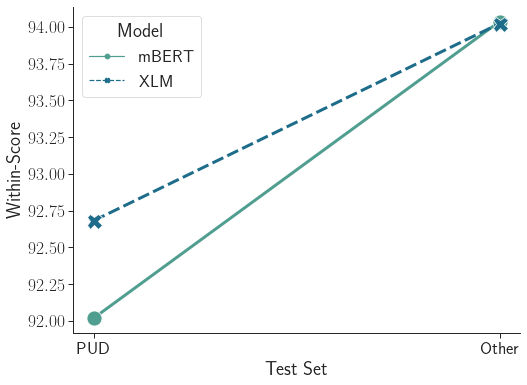

In [59]:
plots.prepare_sns()
sns.set_context("paper", font_scale=2)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

g1 = sns.lineplot(x="Test Set", 
                  y="Within-Score", 
                  hue="Model", 
                  data=df,
                  palette="crest", 
                  linewidth=3, 
                  ax=ax, 
                  legend=True, 
                  dashes=True, 
                  style="Model", 
                  markers=True, 
                  markersize=15)

sns.despine()
plt.show()
plt.close()